In [1]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
!python -m spacy download en_core_web_lg

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


Error processing line 7 of C:\ProgramData\Anaconda3\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\ProgramData\Anaconda3\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored
Error processing line 7 of C:\ProgramData\Anaconda3\lib\site-packages\pywin32.pth:

  Traceback (most recent call last):
    File "C:\ProgramData\Anaconda3\lib\site.py", line 168, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
  ModuleNotFoundError: No module named 'pywin32_bootstrap'

Remainder of file ignored


In [49]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
import en_core_web_sm
nlp = en_core_web_sm.load()

C:\ProgramData\Anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [3]:
import pandas as pd

longdata = pd.read_json('./data.json', lines=True)

¿Se pueden catalogar las noticias con la descripción y los titulares? Compara tu
clasificación con las categorías incluidas en el set de datos.


In [8]:
data

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."
5,Ron Dicker,ENTERTAINMENT,2018-05-26,Morgan Freeman 'Devastated' That Sexual Harass...,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ..."
6,Ron Dicker,ENTERTAINMENT,2018-05-26,Donald Trump Is Lovin' New McDonald's Jingle I...,https://www.huffingtonpost.com/entry/donald-tr...,"It's catchy, all right."
7,Todd Van Luling,ENTERTAINMENT,2018-05-26,What To Watch On Amazon Prime That’s New This ...,https://www.huffingtonpost.com/entry/amazon-pr...,There's a great mini-series joining this week.
8,Andy McDonald,ENTERTAINMENT,2018-05-26,Mike Myers Reveals He'd 'Like To' Do A Fourth ...,https://www.huffingtonpost.com/entry/mike-myer...,"Myer's kids may be pushing for a new ""Powers"" ..."
9,Todd Van Luling,ENTERTAINMENT,2018-05-26,What To Watch On Hulu That’s New This Week,https://www.huffingtonpost.com/entry/hulu-what...,You're getting a recent Academy Award-winning ...


In [4]:
k=data.groupby('category')['authors'].count()
df3 = pd.DataFrame(k)
df3.columns=['N. Articles']
df3.sort_values(['N. Articles'], ascending=False)

,N. Articles
category,
POLITICS,32739
WELLNESS,17827
ENTERTAINMENT,16058
TRAVEL,9887
STYLE & BEAUTY,9649
PARENTING,8677
HEALTHY LIVING,6694
QUEER VOICES,6314
FOOD & DRINK,6226


In [14]:
k=data.groupby('authors')['headline'].count()
df3 = pd.DataFrame(k)
df3.columns=['N. Articles']
df3.sort_values(['N. Articles'], ascending=False)[df3['N. Articles']>100]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,N. Articles
authors,
,36620
Lee Moran,2423
Ron Dicker,1913
"Reuters, Reuters",1562
Ed Mazza,1322
Cole Delbyck,1140
Andy McDonald,1068
Julia Brucculieri,1059
Carly Ledbetter,1054


C:\ProgramData\Anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [50]:
tempdat=pd.DataFrame(columns=['nouns'])

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

In [345]:
#longdata=longdata.sample(frac = 1) 
shortdata=longdata[0:50000]
data=shortdata

In [346]:
wordsarray=[]
for m in range (len(data)):
    docx=nlp(data.short_description[m])
    nouns = [ token.lemma_ for token in docx if token.is_space!=True and token.is_stop != True and token.is_punct !=True and token.is_digit == False ]
    docx=nlp(data.headline[m])
    nouns2 = [ token.lemma_ for token in docx if token.is_space!=True and token.is_stop != True and token.is_punct !=True and token.is_digit == False ]
    nn=nouns+nouns2
    listToStr = ' '.join([str(elem) for elem in nn]) 
    wordsarray.append(listToStr)

In [347]:
data['keywords']=wordsarray

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [348]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=20,stop_words='english')
data_cv = cv.fit_transform(data.keywords)
#data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
#data_dtm.index = data.category
#data_dtm

In [349]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(data_cv)
X_train_tfidf.shape

(50000, 4629)

In [350]:
X = X_train_tfidf
y = data.category
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(LogisticRegression(solver='liblinear', multi_class='ovr'), X_train, Y_train, cv=kfold, scoring='accuracy')
print(cv_results.mean(), cv_results.std())

0.6125487065523746 0.00818469519645443


In [351]:
...
# Make predictions on validation dataset
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [352]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.6045
[[   0    0    0    0    0    0    0    0    2    0    0    0    0    0
     0    0    0    1    1    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0   41    3    1    0    1    0    0   59    0    0    0    3    0
     0    0    2   47    2    0    0    0    2    0    0    0    0    1
     6    2    0]
 [   0    2  126    0    0    2   12    0   66    0    0    0   10    0
     0    2    5   83    4    0    0    7    2    0    0    0    0    1
     8    1    0]
 [   0    0    1   19    0    0    0    0   16    0    0    1    7    0
     0    1    4   73    1    1    0    3    0    1    1    1    1    0
     2    1    0]
 [   0    0    0    0    1    0    0    1    0    0    0    0    0    0
     0    0    0   10    0    0    0    1    0    0    0    0    0    0
     0    0    0]
 [   0    1    1    0    0  188    0    0   92    0    0    0    9    0
     0    3    3  106    3    2    0    5    2    0    0    0    0    0
     3    0    0]
 [   0    0    1    0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
# Load libraries


In [50]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
def url_to_transcript(url):
    headers = {'User-Agent': 'Mozilla/5.0'}
    reg_url = url
    req = Request(url=reg_url, headers=headers) 
    page = urlopen(req).read() 
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find_all('p')]
    return text

In [587]:
shortdata=longdata[0:10000]

In [590]:
categories=shortdata.category.unique()
commonwords=pd.DataFrame(columns=['word','Freq','category'])
textscat=pd.DataFrame(columns=['category','words'])
for ctg in categories[0:30]:
    df=shortdata[shortdata['category']==ctg]
    print(ctg)
    for m in range(50):
        try:
            text= url_to_transcript(df.iloc[m].link)
        except:
            pass
        finally:
            listToStr = ' '.join([str(elem) for elem in text])
            docx=nlp(listToStr)
            nouns = [ token.lemma_ for token in docx if token.pos_ != 'PROPN' and token.is_space!=True and token.is_stop != True and token.is_punct !=True and token.is_digit == False ]
            word_freq = Counter(nouns)
            common_nouns = word_freq.most_common(30)
            common=pd.DataFrame(common_nouns,columns=['word','Freq'])
            common['category']=ctg
            commonwords=pd.concat([commonwords,common])
    df2=commonwords.groupby('word').count()
    df2=df2.sort_values(by='Freq',ascending=False).iloc[0:50]
    ll=[]
    for l in range(len(df2)):
        for k in range(df2.iloc[l].Freq):
            ll.append(df2.index[l])
    listToStr = ' '.join([str(elem) for elem in ll])
    tempdat=pd.DataFrame({'category':[ctg],'words':[listToStr]})
    textscat=pd.concat([textscat,tempdat])

CRIME
ENTERTAINMENT
WORLD NEWS
IMPACT
POLITICS
WEIRD NEWS
BLACK VOICES
WOMEN
COMEDY
QUEER VOICES
SPORTS
BUSINESS
TRAVEL
MEDIA
TECH
RELIGION
SCIENCE
LATINO VOICES
EDUCATION
COLLEGE
PARENTS
ARTS & CULTURE
STYLE
GREEN
TASTE
HEALTHY LIVING


In [602]:
words=[]
for cat in textscat.category:
    df=textscat[textscat.category==cat]
    docx=nlp(df.words[0])
    nouns = pd.DataFrame({"data":[ token.lemma_ for token in docx]}).data.unique().tolist()
    words+=nouns
add_stop_words = [word for word, count in Counter(words).most_common() if count > 10]

In [603]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer


# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42,collocations=False)


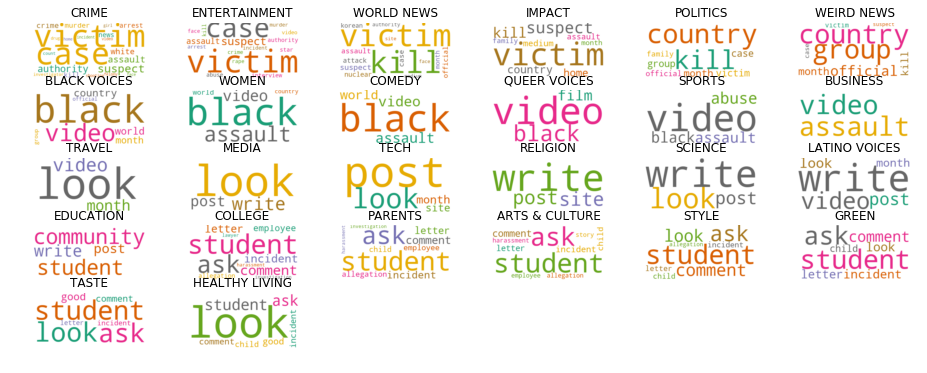

In [604]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

# Create subplots for each comedian
index=0
for ctg in enumerate(textscat.category):
    plt.subplot(5, 6, index+1)
    wc.generate(textscat[textscat['category']==ctg[1]].words.tolist()[0])
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(ctg[1])
    index+=1
plt.show()

In [605]:
add_stop_words

['state',
 'vote',
 'election',
 'say',
 'visit',
 'early',
 'mail',
 'voting',
 'find',
 'office',
 'year',
 'accord',
 'website',
 'voice',
 'report',
 'tell',
 'people',
 'absentee',
 'man',
 'woman',
 'time',
 'know',
 'go',
 'like',
 'right',
 'come',
 'want',
 'need',
 'sexual',
 'work',
 'new',
 'think',
 'day',
 'company',
 'take',
 'help',
 'include',
 'thing',
 'make',
 'police',
 'hear',
 'old',
 'way',
 'statement',
 'life',
 'charge',
 'school',
 'week']

In [3]:
shortdata=longdata[0:10000]

In [4]:
k=shortdata.groupby('authors')['headline'].count()
df3 = pd.DataFrame(k)
df3.columns=['N. Articles']
df3=df3.sort_values(['N. Articles'], ascending=False)[df3['N. Articles']>100]
authors=df3.index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [6]:
authors

Index(['Lee Moran', 'Ed Mazza', 'Ron Dicker', 'Mary Papenfuss',
       'Jenna Amatulli', 'David Moye', 'Curtis M. Wong', '', 'Cole Delbyck',
       'Alanna Vagianos', 'Elyse Wanshel', 'Rebecca Shapiro', 'Andy McDonald',
       'Dominique Mosbergen', 'Willa Frej', 'Carol Kuruvilla', 'Hayley Miller',
       'Carly Ledbetter', 'Sara Boboltz', 'Nick Visser', 'Marina Fang',
       'Sam Levine', 'Carla Herreria', 'Nina Golgowski', 'Antonia Blumberg',
       'Carolina Moreno'],
      dtype='object', name='authors')

In [607]:
commonwords=pd.DataFrame(columns=['word','Freq','Author'])
textscat=pd.DataFrame(columns=['Author','words'])
for ctg in authors[1:30]:
    df=shortdata[shortdata['authors']==ctg]
    print(ctg)
    for m in range(50):
        try:
            text= url_to_transcript(df.iloc[m].link)
        except:
            pass
        finally:
            listToStr = ' '.join([str(elem) for elem in text])
            docx=nlp(listToStr)
            nouns = [ token.lemma_ for token in docx if token.pos_ != 'PROPN' and token.is_space!=True and token.is_stop != True and token.is_punct !=True and token.is_digit == False ]
            word_freq = Counter(nouns)
            common_nouns = word_freq.most_common(30)
            common=pd.DataFrame(common_nouns,columns=['word','Freq'])
            common['Author']=ctg
            commonwords=pd.concat([commonwords,common])
    df2=commonwords.groupby('word').count()
    df2=df2.sort_values(by='Freq',ascending=False).iloc[0:50]
    ll=[]
    for l in range(len(df2)):
        for k in range(df2.iloc[l].Freq):
            ll.append(df2.index[l])
    listToStr = ' '.join([str(elem) for elem in ll])
    tempdat=pd.DataFrame({'Author':[ctg],'words':[listToStr]})
    textscat=pd.concat([textscat,tempdat])


Ed Mazza
Ron Dicker
Mary Papenfuss
Jenna Amatulli
David Moye
Curtis M. Wong

Cole Delbyck
Alanna Vagianos
Elyse Wanshel
Rebecca Shapiro
Andy McDonald
Dominique Mosbergen
Willa Frej
Carol Kuruvilla
Hayley Miller
Carly Ledbetter
Sara Boboltz
Nick Visser
Marina Fang
Sam Levine
Carla Herreria
Nina Golgowski
Antonia Blumberg
Carolina Moreno


In [610]:
words=[]
for cat in textscat.Author:
    df=textscat[textscat.Author==cat]
    docx=nlp(df.words[0])
    nouns = pd.DataFrame({"data":[ token.lemma_ for token in docx]}).data.unique().tolist()
    words+=nouns
add_stop_words = [word for word, count in Counter(words).most_common() if count > 15]

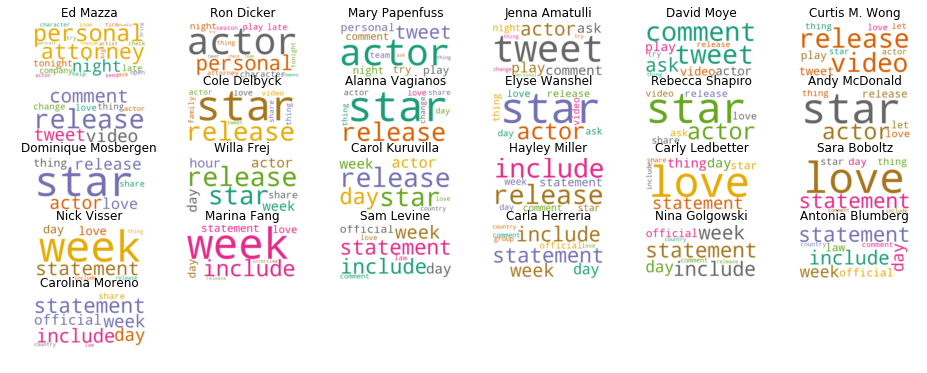

In [611]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42,collocations=False)

plt.rcParams['figure.figsize'] = [16, 6]

# Create subplots for each comedian
index=0
for ctg in enumerate(textscat.Author):
    plt.subplot(5, 6, index+1)
    wc.generate(textscat[textscat['Author']==ctg[1]].words.tolist()[0])
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(ctg[1])
    index+=1
plt.show()

In [615]:
add_stop_words

['election',
 'mail',
 'visit',
 'vote',
 'voting',
 'state',
 'early',
 'voice',
 'website',
 'find',
 'office',
 'absentee',
 'say',
 'year',
 'new',
 'tell',
 'right',
 'people',
 'call',
 'report',
 'take',
 'time',
 'go',
 'want',
 'need',
 'like',
 'write',
 'know',
 'make',
 'post',
 'film',
 'accord',
 'work',
 'woman',
 'hear',
 'come',
 'think',
 'host',
 'president',
 'man',
 'life',
 '$',
 'sexual']

In [8]:
import seaborn as sns

In [9]:
shortdata=longdata[0:100000]

In [10]:
k=shortdata.groupby('authors')['headline'].count()
df3 = pd.DataFrame(k)
df3.columns=['N. Articles']
df3=df3.sort_values(['N. Articles'], ascending=False)[df3['N. Articles']>100]
authors=df3.index

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
def url_to_transcript(url):
    headers = {'User-Agent': 'Mozilla/5.0'}
    reg_url = url
    req = Request(url=reg_url, headers=headers) 
    page = urlopen(req).read() 
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find_all('p')]
    return text

In [21]:
np.int(3/3)

1

In [18]:
np.mod(3,3)

0

Lee Moran


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Ron Dicker
Ed Mazza
Cole Delbyck
Julia Brucculieri
Andy McDonald
Mary Papenfuss
Carly Ledbetter
Curtis M. Wong
Nina Golgowski
Sam Levine
Bill Bradley
David Moye
Igor Bobic
Jenna Amatulli


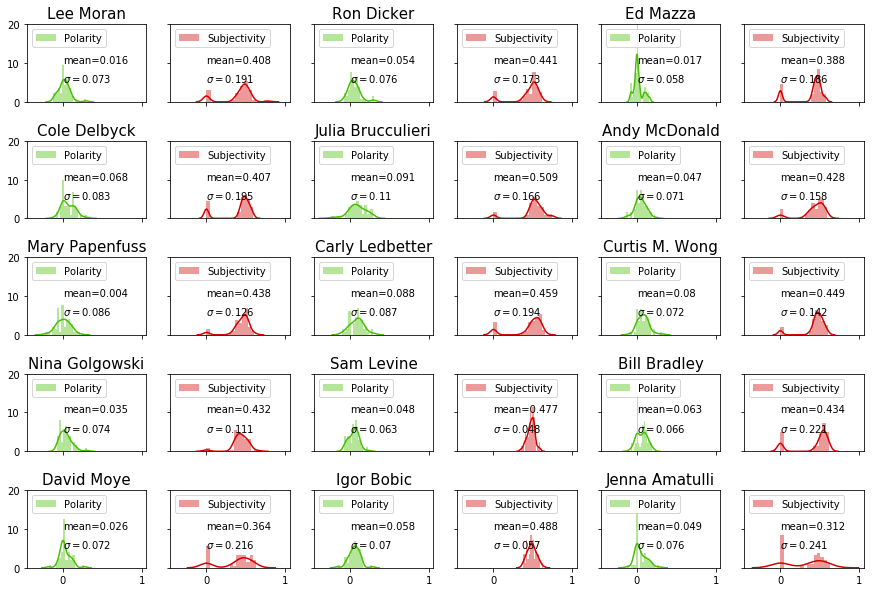

In [32]:
from textblob import TextBlob
fig, ax = plt.subplots(5,6, figsize=(15,10),sharex=True,sharey=True)
commonwords=pd.DataFrame(columns=['word','Freq','Author'])
textscat=pd.DataFrame(columns=['Author','words'])
l=0
for ctg in authors[1:16]:
    df=shortdata[shortdata['authors']==ctg]
    print(ctg)
    polarr=[]
    subarr=[]
    x=np.mod(l,3)
    y=np.int(l/3)
    for m in range(50):
        #print(m)
        try:
            text= url_to_transcript(df.iloc[m].link)
        except:
            pass
        finally:
            listToStr = ' '.join([str(elem) for elem in text])
            docx=nlp(listToStr)
            nouns = [ token.lemma_ for token in docx if token.pos_ != 'PROPN' and token.is_space!=True and token.is_stop != True and token.is_punct !=True and token.is_digit == False ]
            listToStr = ' '.join([str(elem) for elem in nouns])
            polarr.append(TextBlob(listToStr).sentiment.polarity)
            subarr.append(TextBlob(listToStr).sentiment.subjectivity)
    sns.distplot(polarr,ax=ax[y,2*x],norm_hist=True,bins=15,label='Polarity',color='#47BE01')
    sns.distplot(subarr,ax=ax[y,2*x+1],norm_hist=True,bins=15,color='#D10000',label='Subjectivity')
    ax[y,2*x].legend(loc='upper left', fontsize=10)
    ax[y,2*x+1].legend(loc='upper left', fontsize=10)
    ax[y,2*x].text(0.0,10,'mean='+str(np.round(np.mean(polarr),3)) , fontsize=10)
    ax[y,2*x].text(0.0,5,r'$\sigma=$'+str(np.round(np.std(polarr),3)) , fontsize=10)
    ax[y,2*x+1].text(0,10,'mean='+str(np.round(np.mean(subarr),3)) , fontsize=10)
    ax[y,2*x+1].text(0,5,r'$\sigma=$'+str(np.round(np.std(subarr),3)) , fontsize=10)
    ax[y,2*x].set_title(ctg,fontsize=15)
    l+=1
    ax[0,0].set_ylim([0,20])
    #ax[0,0].set_ylim([0,20])
plt.subplots_adjust(hspace=0.5)

In [40]:
stopwords=['state', 'vote', 'election',  'say',  'visit',  'early',  'mail',  'voting',  'find',  'office',  'year',  'accord',  'website',
 'voice',  'report',  'tell',  'people',  'absentee', 'time', 'know', 'go', 'like', 'right', 'come', 'want',
 'need', 'work', 'new', 'think', 'day',  'company', 'take', 'help', 'include', 'thing', 'make', 'police', 'hear',  'old',
 'way',  'statement', 'life', 'charge', 'week']

In [41]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
categories=shortdata.category.unique()

for ctg in categories[0:30]:
    df=shortdata[shortdata['category']==ctg]
    print(ctg)
    fulltext=[]
    for m in range(50):
        try:
            text= url_to_transcript(df.iloc[m].link)
        except:
            pass
        finally:
            listToStr = ' '.join([str(elem) for elem in text])
            docx=nlp(listToStr)
            nouns = [ token.lemma_ for token in docx if token.pos_ != 'PROPN' and token.is_space!=True and token.is_stop != True 
                     and token.is_punct !=True and token.is_digit == False and token.lemma_ not in stopwords]
            listToStr = ' '.join([str(elem) for elem in nouns])
            fulltext.append(listToStr)
    # Initialise the count vectorizer with the English stop words
    count_vectorizer = CountVectorizer(stop_words='english')
    # Fit and transform the processed titles
    count_data = count_vectorizer.fit_transform(fulltext)
    # Tweak the two parameters below
    number_topics = 5
    number_words = 10
    # Create and fit the LDA model
    lda = LDA(n_components=number_topics, n_jobs=-1)
    lda.fit(count_data)
# Print the topics found by the LDA model
    print("Topics found via LDA:")
    print_topics(lda, count_vectorizer, number_words)


CRIME


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
victim case assault prosecutor sexual man woman attorney abuse lawyer

Topic #1:
child bus girl home kid school nah leave family face

Topic #2:
suspect victim case investigator crime school authority site kill hour

Topic #3:
assault woman sexual victim lawsuit trial case jury guilty attorney

Topic #4:
shooting release officer footage hour room survivor hearing sentencing period
ENTERTAINMENT


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
set hard circumstance offer easy feel hour scene interview happen

Topic #1:
victim hard let murder suspect rule hour circumstance interview crime

Topic #2:
school scene season violence gun happen series teen leave cast

Topic #3:
woman set sexual let hard excuse interview feel offer hour

Topic #4:
movie offer row easy let hard hour rule watch excuse
WORLD NEWS


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
plane flight crash official kill site passenger cuban far circumstance

Topic #1:
nuclear summit test korean meeting site expert program talk exercise

Topic #2:
diary abuse page museum publish entry family research write secret

Topic #3:
group attack hour israeli military nuclear kill responsibility hard protest

Topic #4:
deal party nuclear sanction plastic site european country government deep
IMPACT


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
farmer worker rice yield change increase community country series climate

Topic #1:
job worker income basic automation virus idea community union human

Topic #2:
woman farmer ikigai tree world plant plastic study economy seed

Topic #3:
community city business series percent content home big land change

Topic #4:
social anxiety mental symptom disorder feel medium bike health illness
POLITICS


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
suit shooting lawsuit winery yacht false victim file cruise conspiracy

Topic #1:
ad child school disclosure public issue political information gun site

Topic #2:
bot conservation russian tweet group month research request meeting spanish

Topic #3:
neighbor leader love immigrant federal declaration rule service citizen political

Topic #4:
woman abortion rule campaign information offer share responsibility hard easy
WEIRD NEWS


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
squirrel woman student man seat post offer point hard allegedly

Topic #1:
octopus fawn millennial end offer hard varie site rule designate

Topic #2:
cake order customer online profane store sword graduation write censor

Topic #3:
message send ade zombie site man allegedly hard text urine

Topic #4:
let site offer responsibility hard easy register excuse impossible circumstance
BLACK VOICES


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
protest player anthem black national understand stand violence sit patriotism

Topic #1:
black white look video dance person let hurt easy violence

Topic #2:
woman black man rule designate hard let hour easy offer

Topic #3:
feat black actress film protest french woman hit nomination actor

Topic #4:
black officer video white student woman stop hard violence man
WOMEN


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
woman man sexual assault let rule hard period offer hour

Topic #1:
woman sexual student allegation harassment festival comment director male ask

Topic #2:
woman sexual man let rule excuse hour responsibility offer wear

Topic #3:
abortion gift woman rape case look care mom feel sign

Topic #4:
woman girl young abuse petition man leader social event offer
COMEDY


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
offer hard let hour responsibility locality register designate site citizen

Topic #1:
hat red love hit porn convinced fear rock confuse star

Topic #2:
swamp drain shut immigrant let outside royal black watch actually

Topic #3:
coin watch hour offer excuse site impossible designate goodbye coronavirus

Topic #4:
episode prove animal goofy entry competition password muslim racist late
QUEER VOICES


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
employee organization store boy participant change announce scout terminate support

Topic #1:
gay offer site citizen hour hard easy let community period

Topic #2:
transgender man photo easy woman wear site gender position character

Topic #3:
therapy conversion book child practice young family love kid parent

Topic #4:
church happen certificate pastor memorial denomination congregation place character interim
SPORTS


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
athlete excuse sport site cheerleader team varie offer college locality

Topic #1:
college player school basketball athlete sport huffpost hand play team

Topic #2:
team game player play hard pardon point rule let protest

Topic #3:
sport anthem win game performance song race play million finish

Topic #4:
athlete abuse sexual rule team female hour woman let level
BUSINESS


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
arbitration sexual harassment group card breach write woman assault employee

Topic #1:
tax percent city million offer billion gun hour rule deal

Topic #2:
woman man store employee business trade simmon datum offer image

Topic #3:
housing city appeal community environmental resident fight build supportive homelessness

Topic #4:
woman sexual assault case harassment file driver letter worker public
TRAVEL


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
flight attendant travel passenger plane kid book trip air good

Topic #1:
stay town region city island couple worth love place country

Topic #2:
city travel good beach food hotel summer weather restaurant month

Topic #3:
pet animal airline dog fly cargo death carrier travel high

Topic #4:
room hotel list travel germ good summer remote destination affect
MEDIA


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
woman sexual allegation story harassment tape let network host hour

Topic #1:
news union organization responsibility medium platform site begin anti newspaper

Topic #2:
post write blog sexual woman network site harassment claim hard

Topic #3:
mean coate question let actually talk write story hard lot

Topic #4:
business tabloid coverage boss seize financial lawyer allege payment month
TECH


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
user datum rule information app site hour hard offer let

Topic #1:
password user account bug store internal twitter believe mask log

Topic #2:
emoji flamethrower control information application birth site offer hard pill

Topic #3:
information robot rule public forget ruling conviction search remove court

Topic #4:
speech lawsuit hate bug housing child family discrimination disability exclude
RELIGION


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
percent believe refugee church evangelical religious immigrant christian belief law

Topic #1:
church abuse man victim love bishop offer citizen site hour

Topic #2:
list experience woman diocese abuse offer accuse hour turban teen

Topic #3:
news fake responsibility story message tree medium site write journalist

Topic #4:
festival letter event write muslim community religious young british celebration
SCIENCE


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
rocket neonicotinoid launch lightning bee risk land use monster bear

Topic #1:
planet probe image edit scientist release orbit close mile photo

Topic #2:
scientist study researcher climate research woman hour offer science social

Topic #3:
scientist moon site change hour period study hard easy let

Topic #4:
write letter form look read looptail reading ask lowercase experiment
LATINO VOICES


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
prison child mother woman share inmate live parent write camp

Topic #1:
hour citizen let latino responsibility hard period offer rule register

Topic #2:
post share immigrant video artist album free single singer music

Topic #3:
immigrant dreamer undocumented college 000 deportation care reproductive program add

Topic #4:
video arrest agent post face racist immigration criminal daughter restaurant
EDUCATION


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
school teacher student district education public charter child standard change

Topic #1:
profit negotiator department meeting college rule school public student represent

Topic #2:
student school college high program tax graduate rule hour food

Topic #3:
school student teacher threat math violence strike shooting deal assessment

Topic #4:
school teacher student public pay district meeting change college child
COLLEGE


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
student campus college university feel responsibility hard let easy offer

Topic #1:
change love feel speech speak good hope friend hard hour

Topic #2:
today maybe feel american citizen fact force violence long racism

Topic #3:
entitlement sense disorder uncertainty worker personality young expectation expect condition

Topic #4:
student college campus school program university education high study faculty
PARENTS


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
breastfeed ad discount baby mom feed public child month language

Topic #1:
tired cup trade sing tiredness remember sleep feeding 1st literally

Topic #2:
kid parent baby good gram calorie fat child fast shower

Topic #3:
kid child parent baby girl boy family mom good love

Topic #4:
baby parent kid child sunshine mom family good loss feel
ARTS & CULTURE


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
statue monument film short share book hearing public post million

Topic #1:
woman art man black story artist model sexual girl young

Topic #2:
model photographer agent agency sexual woman fashion industry young book

Topic #3:
book tote design woman fantasy store read bag bookstore draw

Topic #4:
painting art million auction price sale attribution sell market percent
STYLE


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
look skin face photo mirror product body share good winter

Topic #1:
skin look makeup hand blackhead good face model style feel

Topic #2:
share post look skin link gift receive purchase winter trend

Topic #3:
check singer choice style lot glam walk paneling look bona

Topic #4:
hair coat beauty feel look share good woman cruelty free
GREEN


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
wildfire deer flow mudslide burn debris monkey resident area period

Topic #1:
ice freeze bear area water swimmer oxygen sea environmental long

Topic #2:
climate change cold energy temperature oil hour drilling rule review

Topic #3:
cheetah animal zoo asiatic cold temperature protect penguin area weather

Topic #4:
power cold shark grid coal shock plant price likely temperature
TASTE


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
twitter chicken house gingerbread com pic roast dish food family

Topic #1:
recipe chocolate holiday sweet flavor cookie easy serve dish perfect

Topic #2:
woman chicken dinner cook food hot add family leek flavor

Topic #3:
ice drink cook outside american try serve restaurant reporter hold

Topic #4:
bartender drink restaurant casserole piegate pineapple serve pie good food
HEALTHY LIVING


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
drug abnormal result health cancer doctor cell product prescription change

Topic #1:
feel flu food pressure blood high good product anxiety disorder

Topic #2:
holiday health feel mental friend food home month ask end

Topic #3:
health food sugar feel woman research diet study addiction benefit

Topic #4:
cheese diet study introvertproblem introvert analysis meta benefit observational health
THE WORLDPOST


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
country world government power change chinese global rule political film

Topic #1:
country power party nuclear world chinese campaign government war long

Topic #2:
monument weapon statue trial isis international debate autonomous crime evidence

Topic #3:
weapon autonomous nuclear force global world security lethal power citizen

Topic #4:
battery ban cost polymer group lithium cheap hate extremist energy
GOOD NEWS


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
water carbon monoxide seal little cut let ice symptom poisoning

Topic #1:
live panda love red moment learn couple family hard today

Topic #2:
student sign welcome sleep grocery school dog question immigrant bear

Topic #3:
let win hour father game mile officer citizen community family

Topic #4:
let offer responsibility site hard hour impossible easy register circumstance
WORLDPOST


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
government country school world turkish political policy american force hard

Topic #1:
country region russian power relation political military administration deal economic

Topic #2:
military war american risk administration country policy force world foreign

Topic #3:
resolution d8 settlement principle solution d9 international israeli administration vision

Topic #4:
government pardon international issue law proposal rule counterterrorism let actor
FIFTY


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Topics found via LDA:

Topic #0:
woman child family love hour easy let world long live

Topic #1:
care family age caregiver look plan medication love good dementia

Topic #2:
pain opioid grief adult drug good use job age guide

Topic #3:
school child abroad overseas live care country healthcare local language

Topic #4:
live let story good fear age hard citizen offer feel


In [42]:
shortdata=longdata[0:50000]
data=shortdata

In [43]:
wordsarray=[]
for m in range (len(data)):
    docx=nlp(data.short_description[m])
    nouns = [ token.lemma_ for token in docx if token.is_space!=True and token.is_stop != True and token.is_punct !=True and token.is_digit == False ]
    #docx=nlp(data.headline[m])
    #nouns2 = [ token.lemma_ for token in docx if token.is_space!=True and token.is_stop != True and token.is_punct !=True and token.is_digit == False ]
    wordsarray.append(len(nouns))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Frequency')

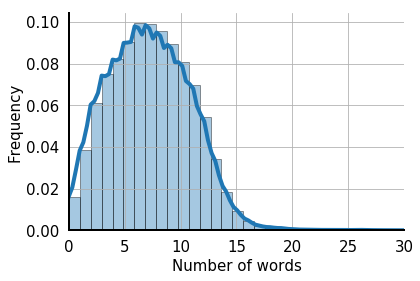

In [59]:
fig, ax = plt.subplots(1,1, figsize=(6,4))
sns.distplot(wordsarray,norm_hist=True,hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4},bins=40)
ax.set_xlim([0,30])
ax.grid()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(2)
    ax.tick_params(axis='both', width=2,length=6)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
    ax.tick_params(axis='both', width=0,length=6)
plt.xlabel('Number of words',fontsize=15)
plt.ylabel('Frequency',fontsize=15)